In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # 'fetch_openml()' downloads datasets from Open ML database. 'return_X_y' returns (data,targets). unpacked and assigned to X, y

print(X.shape, y.shape) # 70000 datapoints, 784 features (28 x 28 pixels)
print(np.min(X), np.max(X)) # feature values range from 0 (white) to 255 (black)
print(y[0:5]) # first 5 target values: digits 0 to 9 stored as strings



(70000, 784) (70000,)
0.0 255.0
['5' '0' '4' '1' '9']


In [3]:
X3 = X[y <= '3'] # select only datapoints with digits 0 to 3 with mask
y3 = y[y <= '3'] # select only corresponding targets with mask

print(X3.shape, y3.shape) # new dataset size 
print(np.min(X3), np.max(X3)) 
print(y3[0:5]) # we see the target values are only from 0 to 3 now


(28911, 784) (28911,)
0.0 255.0
['0' '1' '2' '1' '3']


In [4]:
np.set_printoptions(linewidth = 200) # set higher 'lindwidth' (default = 75 ) so the image data will properly fit the screen
print(X3[0].reshape(28,28)) # reshape features array to 28 x 28 to view the first image data properly. we can see it's a handwritten 0 


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54. 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.]

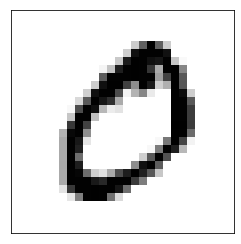

In [5]:
plt.matshow(X3[0].reshape(28, 28), cmap=plt.cm.gray_r) # 'matshow()' displays an array as a matrix, 'cmap=' passing grayscale colormap ('gray_r' makes the colormap run from 0=white to 255=black)
plt.xticks(()) # remove x tick marks
plt.yticks(())  # remove y tick marks
plt.show()


In [7]:
mlp=MLPClassifier(hidden_layer_sizes=(6), solver='sgd', random_state=2) # instantiate neural network with: 1 hidden layer w/ 6 nodes, 'sgd' solver.
                                                        # default n input nodes = n features, 'relu' activation for hidden layer.
                                                        # default for multilabel classification: n output neurons = n targets, 'softmax' activation for output layer
#  
#                                    input layer  ->  hidden layer  ->  output layer
#                                    784 neurons      6 neurons         4 neurons (targets 0, 1, 2, 3)
#                                                     relu activation   softmax activation

mlp.fit(X3, y3) # fit neural network. takes a while but it does converge (find optimal coefficients: weights and biases)


# look at weights at biases

print("'mlp.coefs_' list with", len(mlp.coefs_), "elements:") # neural network's weights stored in  'mlp.coefs_' as a list with 2 elements
print()
print("hidden layer weights", mlp.coefs_[0].shape) # the first element in the list is an array of the weights for the hidden layer.
                           # row = features, column = each neuron in the hidden layer. so 784 features (inputs) with 6 weights each (one per hidden layer neuron)
print(mlp.coefs_[0][0:20]) # first 20 (of 784) feature's weights: each feature has 6 values, one for each hidden layer neuron 
print(" ...")
print()
print("output layer weights", mlp.coefs_[1].shape) # the second element in the list is an array of the weights for the output layer.
                           # row = each neuron in the hidden layer, column = each neuron in the output layer. so 6 hidden layer neurons with 4 weights each (one per output layer neuron)
print(mlp.coefs_[1][0:6]) # all 6 hidden layer neuron's weights: eacah hidden layer neuron has 4 values, one for each output layer neuron



'mlp.coefs_' list with 2 elements:

hidden layer weights (784, 6)
[[-1.11549767e-02 -8.26228225e-02  8.65530719e-03 -1.12721834e-02 -1.38785088e-02 -2.95696934e-02]
 [-5.14746124e-02  2.07868575e-02 -3.49167101e-02 -4.06379554e-02  2.11115228e-02  5.07896080e-03]
 [-6.36863677e-02  2.36643067e-03 -5.49966497e-02  4.97289596e-02  6.16917445e-02 -1.00441913e-03]
 [ 6.03996467e-02 -7.32604912e-02  9.14302377e-04 -7.57630107e-02 -1.25270297e-02 -7.03176526e-02]
 [-6.49795402e-02  1.68610268e-02 -4.77513488e-02 -6.85025393e-02 -4.87457695e-02 -2.61726698e-02]
 [-5.61408186e-03 -5.19809745e-02  2.44704532e-02 -2.95063356e-03  9.12669330e-04 -1.97126461e-02]
 [ 5.11759074e-02  1.39433386e-02 -5.88554880e-02  3.49876467e-02  8.09631834e-02  1.45720672e-06]
 [ 6.78865807e-02 -2.76039890e-02  1.17020551e-02 -1.26274800e-02 -1.10238533e-02  4.81994617e-02]
 [ 6.20518895e-03  7.90793880e-02  7.70471436e-03 -7.28335955e-02 -2.32941976e-02  6.11471481e-02]
 [-1.63346319e-02 -8.24004145e-02 -4.406261

In [8]:
print("'mlp.intercepts_' list with", len(mlp.intercepts_), "elements:") # neural network's biases stored in 'mlp.intercepts_' as a list with 2 elements
print()
print("hidden layer biases", mlp.intercepts_[0].shape) # the first element in the list is a 1d array of the biases for the hidden layer.
                                # 6 neurons in the hidden layer so 6 biases, one for each neuron
print(mlp.intercepts_[0][0:6]) # all 6 hidden layer neuron's biases
print()
print("output layer biases", mlp.intercepts_[1].shape) # the second element in the list is a 1d array of the biases for the output layer.
                                # 4 neurons in the output layer so 4 biases, one for each neuron
print(mlp.intercepts_[1][0:4]) # all 4 output layer neuron's biases

'mlp.intercepts_' list with 2 elements:

hidden layer biases (6,)
[-0.09079433  0.05372968  0.07468312  0.0185522   0.04822678 -0.06673119]

output layer biases (4,)
[-2.56603365  1.10566874  0.98161485  0.99880232]


plots of the 6 hidden layer neurons' weights:


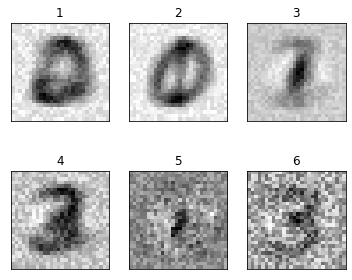

In [9]:
#visualize weights of hidden layer

print("plots of the 6 hidden layer neurons' weights:")
fig, axes = plt.subplots(2, 3, figsize=(6, 5)) # use 'subplots()' to create multiple axes (plots) within a single figure. creates 2 rows x 3 columns array of axes (6 axes)
for i, ax in enumerate(axes.ravel()): # 'ravel()' reshapes axes from 2d array (2,3) to 1d array (6,)
                                      # 'enumerate()' makes the axes iterable (capable of being called one at a time in a 'for' loop)
                                      # 'for' loop over 'i' and each 'ax' (runs 6 times because 6 axes)
    weights = mlp.coefs_[0][:, i] # selects each column from array of weights for the hidden layer. i column = i neuron's weights (1st column = 1st neuron's weights, etc.)
    ax.matshow(weights.reshape(28, 28), cmap=plt.cm.gray) # reshapes each neuron's 784 weights to a 28 x 28 grid, plots them with grayscale colormap
    ax.set_xticks(()) # erases tick marks
    ax.set_yticks(()) # "
    ax.set_title(i + 1) # sets each plot's title
plt.show()
# You can see that neurons 4 and 6 are determining if the digit is a 3. 
# Neuron 1 is determining if the digit is a 0 or a 2 since you can see both of those values in the image
# Not every hidden neuron will have an obvious use.

# code and comments by github.com/alandavidgrunberg
